# Rough

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture
from poly2.simulator import SimulatorOneTrait

In [3]:
df = pd.read_csv('../outputs/combined/fung_scan.csv')

In [4]:
df.head()

,year,n_pos_diff,mu,b
0,1,9,1.534736,14.303787
1,2,9,1.534736,14.303787
2,3,9,1.534736,14.303787
3,4,9,1.534736,14.303787
4,5,9,1.534736,14.303787


In [5]:
noise = np.random.normal(0, 0.05, size=len(df.n_pos_diff))

df2 = (
    df
    # .assign(n_pos_diff = lambda x: (x.n_pos_diff<9).astype(int) + noise)
    .assign(n_pos_diff = lambda x: x.n_pos_diff + noise)
)

<AxesSubplot:xlabel='year', ylabel='n_pos_diff'>

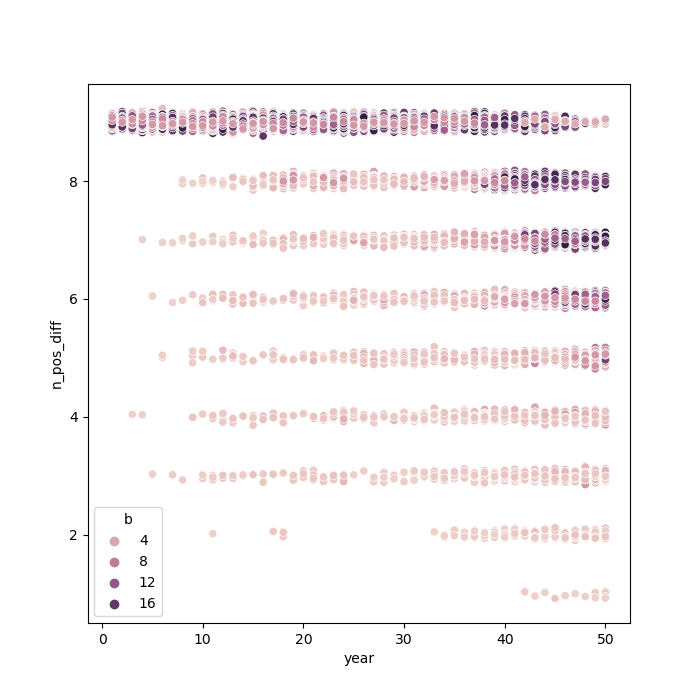

In [6]:
f, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    # hue='mu',
    # size='b',
    hue='b',
    data=df2,
    ax=ax,
    # alpha=0.5,
)